In [16]:
!pip install -q japanize_matplotlib


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import japanize_matplotlib

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

plt.rcParams['figure.figsize'] = 10, 6

In [18]:
df = pd.read_csv('/content/drive/MyDrive/auto-mpg.csv')
df.head(3)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,America
1,15.0,8,350.0,165.0,3693.0,11.5,70,America
2,18.0,8,318.0,150.0,3436.0,11.0,70,America


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   Year          392 non-null    int64  
 7   Origin        392 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 24.6+ KB


In [20]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


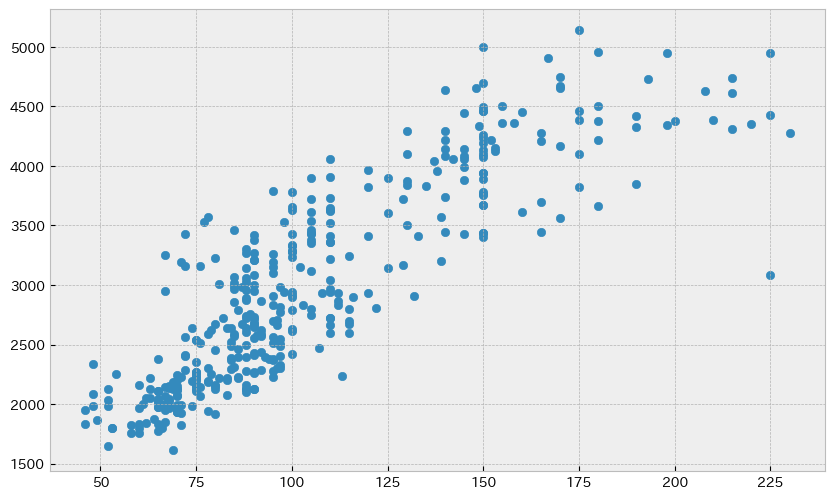

In [21]:
plt.scatter(df['Horsepower'], df['Weight']);

In [22]:
df[['Horsepower', 'Weight']].corr()

,Horsepower,Weight
Horsepower,1.000000,0.864538
Weight,0.864538,1.000000


In [23]:
_df = df[['Horsepower', 'Weight']].drop(df.index[(df['Horsepower']==225.0) & (df['Weight']==3086.0)])
len(_df)

391

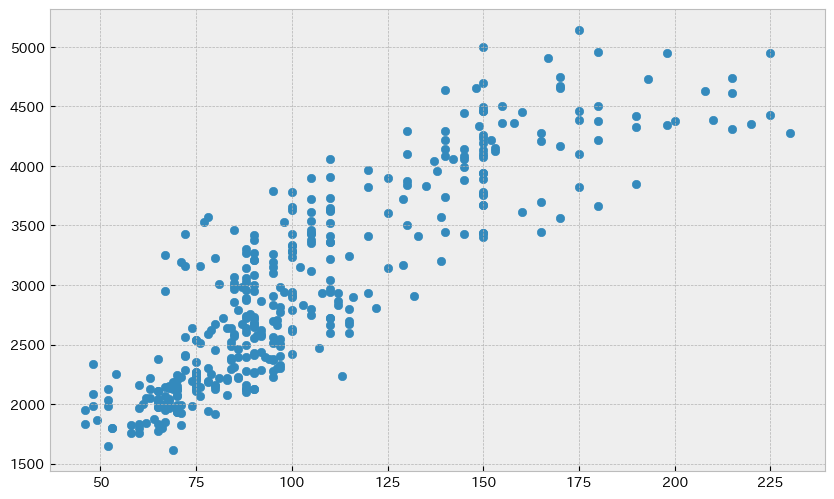

In [24]:
plt.scatter(_df['Horsepower'], _df['Weight']);

In [25]:
_df.corr()

,Horsepower,Weight
Horsepower,1.000000,0.874596
Weight,0.874596,1.000000


In [26]:
from scipy import stats

In [27]:
r, pvalue = stats.pearsonr(_df['Horsepower'], _df['Weight'])
print(f'相関係数：{r}')
print(f'p 値：{pvalue}')

相関係数：0.874595623086128
p 値：2.327476009647787e-124


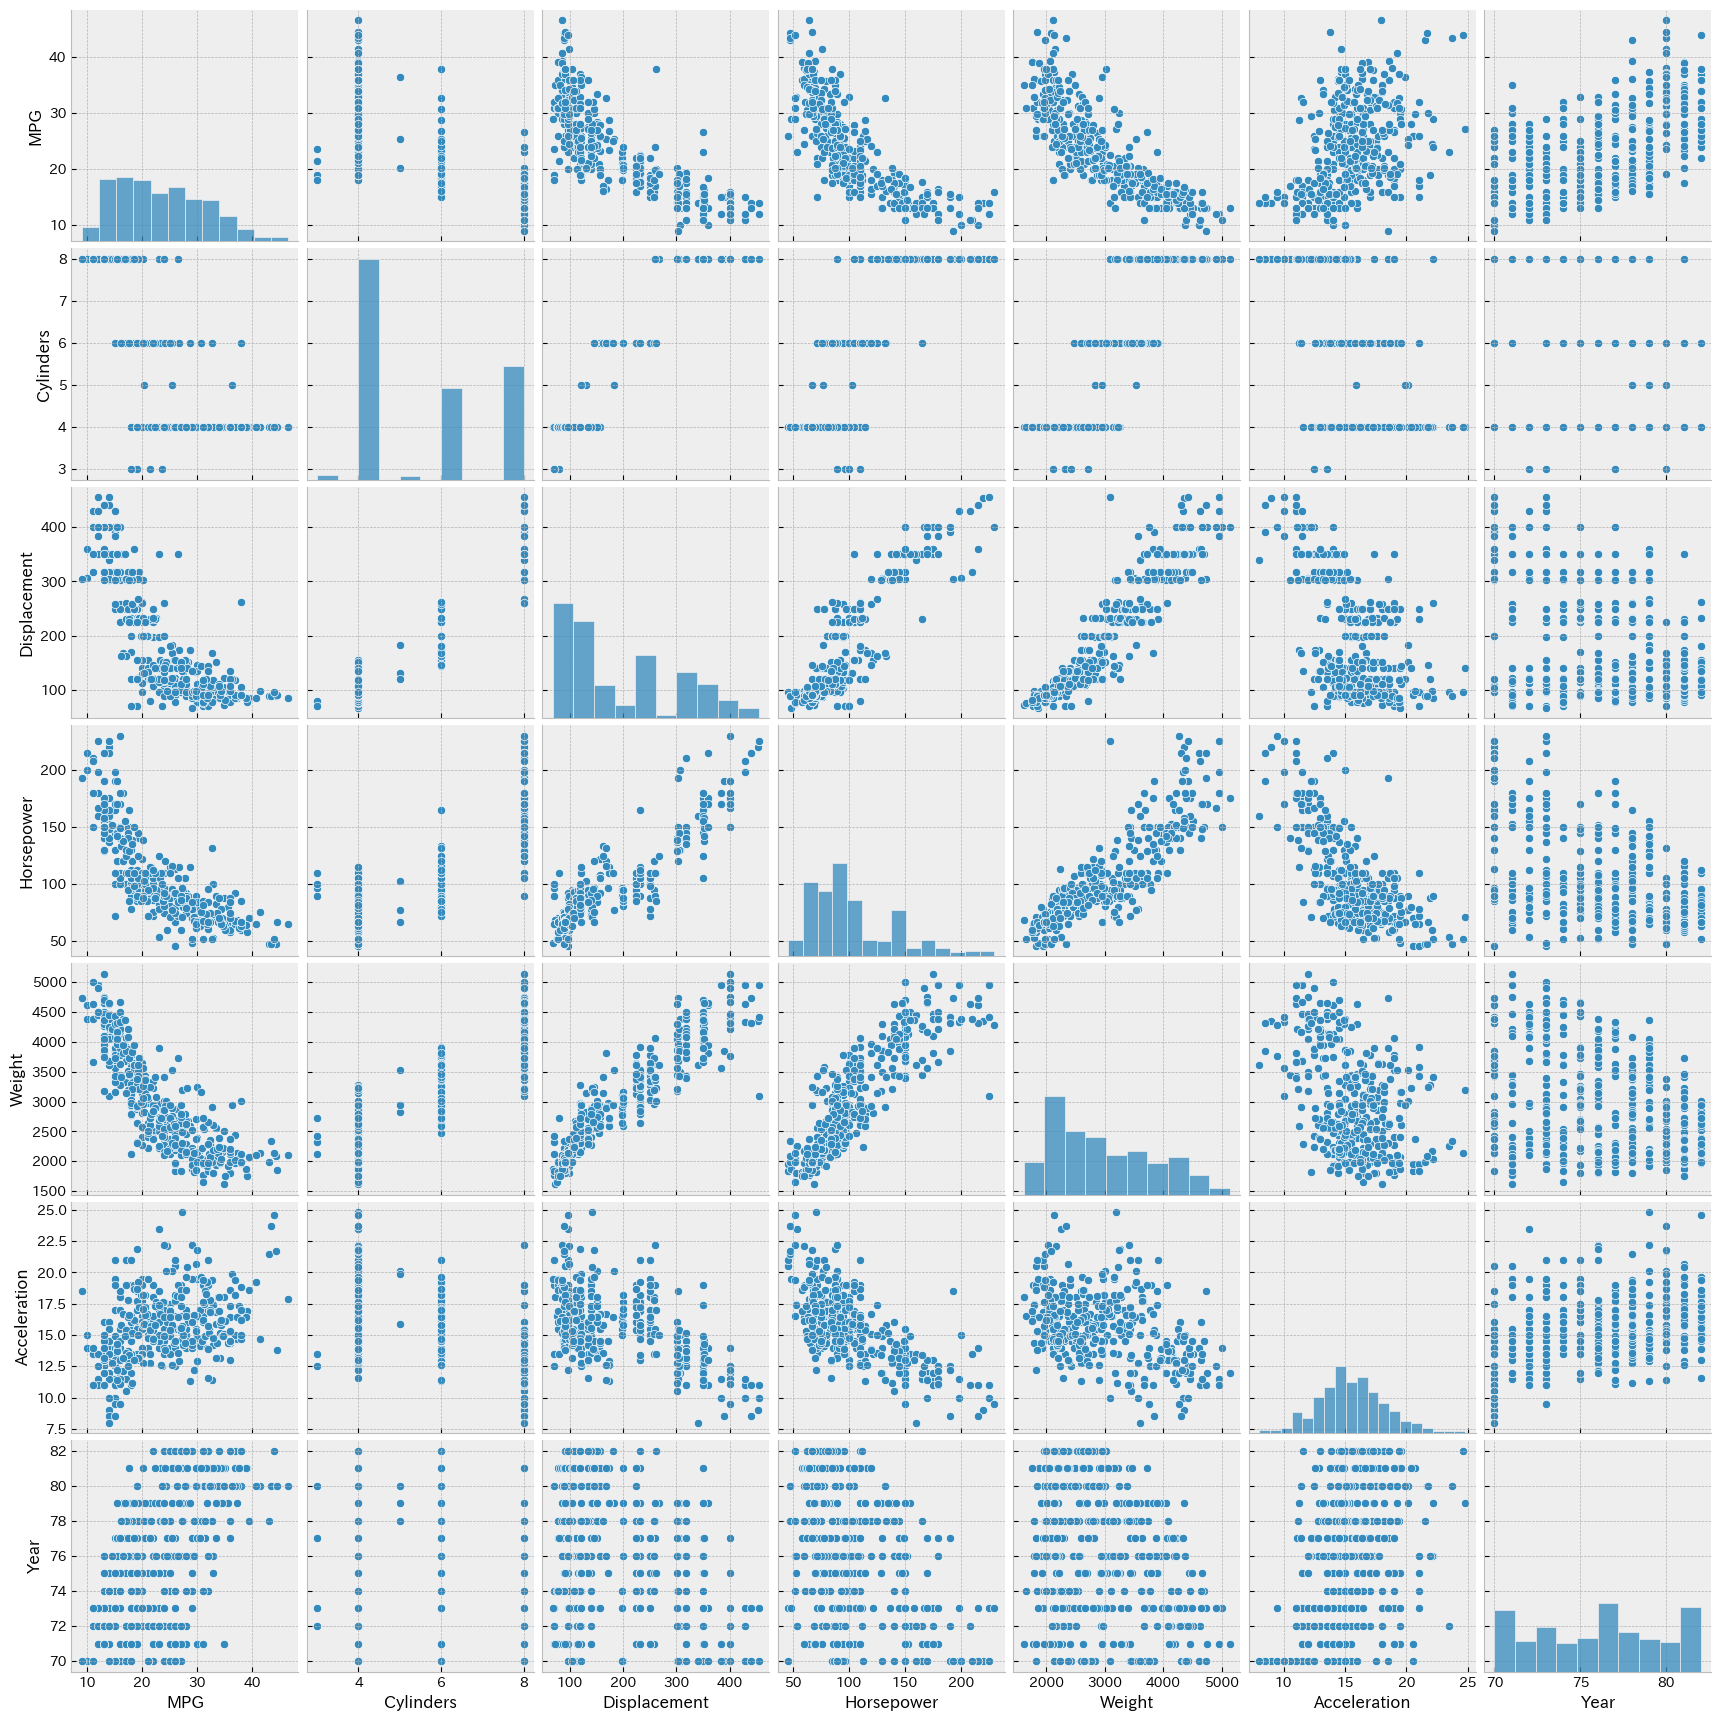

In [28]:
sns.pairplot(df);

In [29]:
df.corr()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year
MPG,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
Cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
Displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
Horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
Weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
Acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
Year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


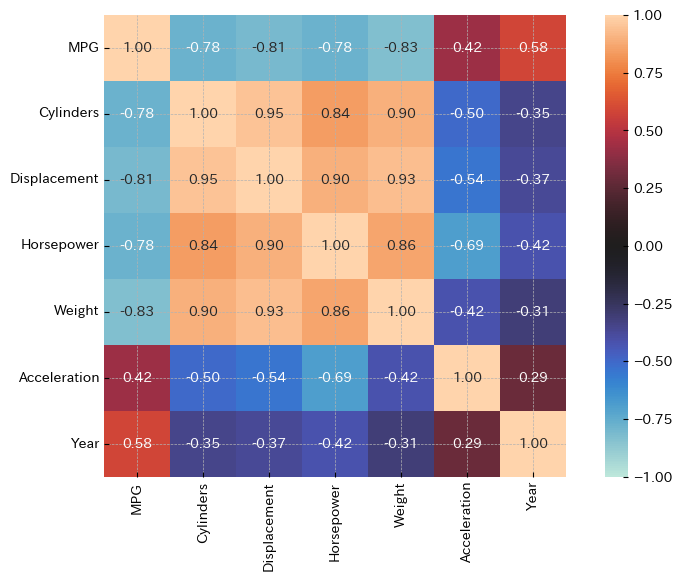

In [30]:
sns.heatmap(df.corr(), annot=True, square=True, vmax=1, vmin=-1, center=0, fmt='.2f');

In [31]:
import statsmodels.api as sm

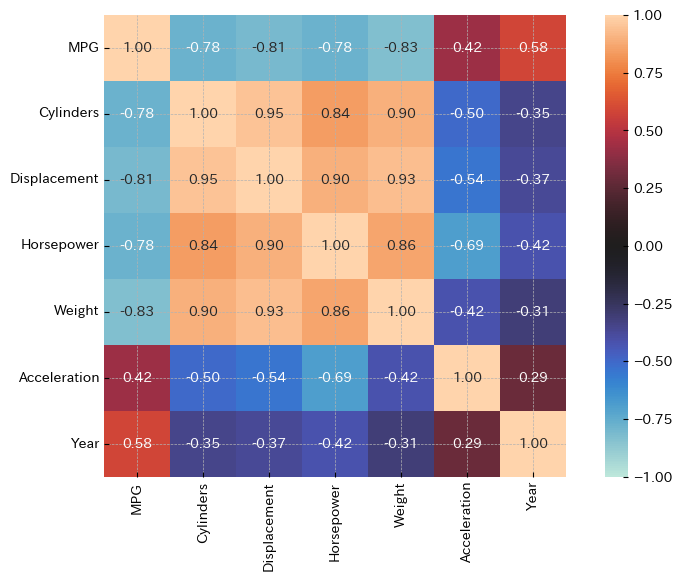

In [32]:
sns.heatmap(df.corr(), annot=True, square=True, vmax=1, vmin=-1, center=0, fmt='.2f');

In [33]:
# 目的変数と説明変数の取得
y = df['MPG']
x = df['Weight']

In [34]:
# 裏側で動く乱数の固定
np.random.seed(0)

In [35]:
sm.add_constant(x).head(3)

,const,Weight
0,1.0,3504.0
1,1.0,3693.0
2,1.0,3436.0


In [36]:
# モデルのインスタンス化
simple_ols = sm.OLS(y, sm.add_constant(x))

In [37]:
result = simple_ols.fit()

In [38]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Sat, 03 Jun 2023   Prob (F-statistic):          6.02e-102
Time:                        09:07:21   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2165      0.799     57.867      0.000      44.646      47.787
Weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
result.params

const     46.216525
Weight    -0.007647
dtype: float64

In [40]:
result.rsquared

0.6926304331206254

In [41]:
result.pvalues

const     1.623069e-193
Weight    6.015296e-102
dtype: float64

In [42]:
pred = result.predict()
pred[:3]

array([19.4202363 , 17.97488856, 19.9402556 ])

In [43]:
df['MPG'][:3]

0    18.0
1    15.0
2    18.0
Name: MPG, dtype: float64

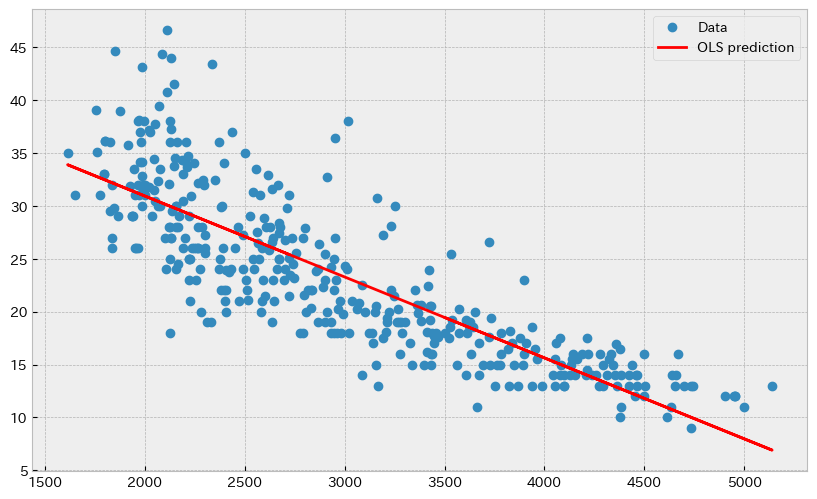

In [45]:
fig, ax = plt.subplots()

ax.plot(x, y, 'o', label="Data")
ax.plot(x, pred, 'r', label="OLS prediction")

ax.legend(loc="best")

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [47]:
x = df.drop(['MPG','Origin'], axis=1) #axis: 1: 列、0: 行  
y = df['MPG']  

x.head(3)

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year
0,8,307.0,130.0,3504.0,12.0,70
1,8,350.0,165.0,3693.0,11.5,70
2,8,318.0,150.0,3436.0,11.0,70


In [48]:
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 1.48394702,  1.07728956,  0.66413273,  0.62054034, -1.285258  ,
        -1.62531533],
       [ 1.48394702,  1.48873169,  1.57459447,  0.84333403, -1.46672362,
        -1.62531533],
       [ 1.48394702,  1.1825422 ,  1.18439658,  0.54038176, -1.64818924,
        -1.62531533],
       ...,
       [-0.86401356, -0.56847897, -0.53247413, -0.80463202, -1.4304305 ,
         1.63640964],
       [-0.86401356, -0.7120053 , -0.66254009, -0.41562716,  1.11008813,
         1.63640964],
       [-0.86401356, -0.72157372, -0.58450051, -0.30364091,  1.40043312,
         1.63640964]])

In [49]:
multi_ols = sm.OLS(y, sm.add_constant(x_scaled))

result = multi_ols.fit()

In [50]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     272.2
Date:                Sat, 03 Jun 2023   Prob (F-statistic):          3.79e-135
Time:                        09:21:40   Log-Likelihood:                -1036.5
No. Observations:                 392   AIC:                             2087.
Df Residuals:                     385   BIC:                             2115.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.4459      0.174    135.130      0.000      23.105      23.787
x1            -0.5619      0.566     -0.993      0.321      -1.674       0.550
x2             0.8025      0.769      1.044      0.297      -0.709       2.314
x3            -0.0150      0.532     -0.028      0.977      -1.061       1.031
x4            -5.7640      0.568    -10.141      0.000      -6.882      -4.646
x5             0.2350      0.281      0.836      0.404      -0.318       0.788
x6             2.7717      0.194     14.318      0.000       2.391       3.152
==============================================================================
Omnibus:                       37.865   Durbin-Watson:                   1.232
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.248
Skew:                           0.630   Prob(JB):                     8.26e-14
Kurtosis:                       4.449   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
result.rsquared_adj

0.8062826441922383

In [52]:
# 偏回帰係数
result.params

const    23.445918
x1       -0.561950
x2        0.802476
x3       -0.015045
x4       -5.764000
x5        0.234957
x6        2.771664
dtype: float64

In [53]:
# p 値
result.pvalues

const    0.000000e+00
x1       3.212169e-01
x2       2.973318e-01
x3       9.774501e-01
x4       1.416190e-21
x5       4.038303e-01
x6       1.410428e-37
dtype: float64

In [54]:
# t 値  
result.tvalues

const    135.130285
x1        -0.993240
x2         1.043586
x3        -0.028284
x4       -10.140877
x5         0.835721
x6        14.317630
dtype: float64

In [55]:
pred = result.predict(sm.add_constant(x_scaled))
pred[:3]

array([15.08291904, 14.07257469, 15.53631544])

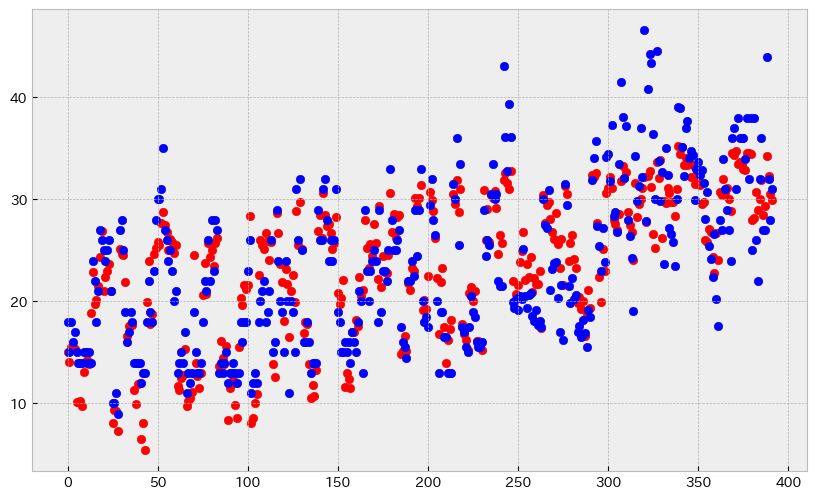

In [56]:
num = list(range(0, len(x)))
plt.scatter(num, pred, c='red');
plt.scatter(num, y, c='blue');

In [57]:
params = result.params.rename({
    'x1':'Cylinders', 
    'x2':'Displacement',
    'x3':'Horsepower',
    'x4':'Weight',
    'x5':'Acceleration',
    'x6':'Year'
    })

In [58]:
np.sign(params) - np.sign(df.corr()['MPG'].drop('MPG', axis=0))

Acceleration    0.0
Cylinders       0.0
Displacement    2.0
Horsepower      0.0
Weight          0.0
Year            0.0
const           NaN
dtype: float64

In [59]:
x_scaled = scaler.fit_transform(df.drop(['Displacement', 'MPG', 'Origin'], axis=1))

ols_scaled = sm.OLS(y, sm.add_constant(x_scaled))
result_scaled = ols_scaled.fit()

result_scaled.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     326.4
Date:                Sat, 03 Jun 2023   Prob (F-statistic):          3.43e-136
Time:                        09:28:56   Log-Likelihood:                -1037.0
No. Observations:                 392   AIC:                             2086.
Df Residuals:                     386   BIC:                             2110.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.4459      0.174    135.115      0.000      23.105      23.787
x1            -0.1663      0.420     -0.396      0.692      -0.992       0.660
x2             0.1168      0.517      0.226      0.821      -0.899       1.133
x3            -5.5025      0.510    -10.784      0.000      -6.506      -4.499
x4             0.2024      0.279      0.724      0.469      -0.347       0.752
x5             2.7568      0.193     14.278      0.000       2.377       3.136
==============================================================================
Omnibus:                       39.254   Durbin-Watson:                   1.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.052
Skew:                           0.646   Prob(JB):                     2.03e-14
Kurtosis:                       4.480   Cond. No.                         7.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""